In [91]:
from pylab import *
import networkx as nx
import numpy as np
from scipy.stats import pearsonr
# Check the installed version of NetworkX. 
nx.__version__

'3.0'

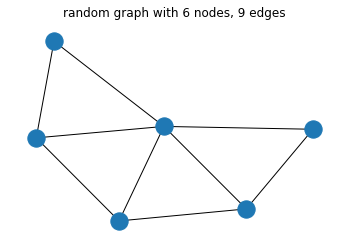

In [92]:
# ===================== Step 1 ===========================
# nodes
n_1 = 6
n_2 = 10
n_3 = 20

# plot 1: 6 nodes, 9 edges
Graph_1 = nx.gnm_random_graph(n_1, 1.5 * n_1)
title('random graph with 6 nodes, 9 edges')
nx.draw(Graph_1)

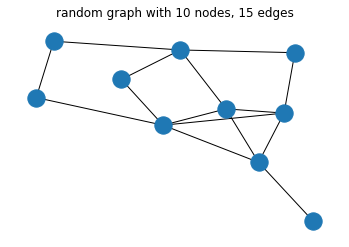

In [93]:
# plot 2: 10 ndoes, 15 edges
Graph_2 = nx.gnm_random_graph(n_2, 1.5 * n_2)
title('random graph with 10 nodes, 15 edges')
nx.draw(Graph_2)

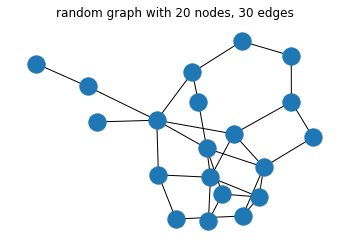

In [94]:
# plot 3: 20 nodes, 30 edges
Graph_3 = nx.gnm_random_graph(n_3, 1.5 * n_3)
title('random graph with 20 nodes, 30 edges')
nx.draw(Graph_3)

In [95]:
# ===================== Step 2 ===========================
def func_degrees_descend(graph):
    degrees_descend = sorted([d for n, d in graph.degree()], reverse=True)
    # print(str(graph) + ": degrees sequence in a descending order is " + str(degrees_descend))
    return degrees_descend

In [96]:
# ===================== Step 3 ===========================
'''
Use a dynamic programming algorithm to achieve the anonymized degree sequences
'''

def degree_anonymization(d, n, k):
    # d: degree sequence
    # n: number of nodes
    # k: k-anonymity parameter

    # initialize a 2D dp array with minimum cost to make the first i nodes k-anonymous with total degree sum of j
    dp = np.zeros((n + 1, k * n + 1))

    # calculate the minimum cost for each node i
    for i in range(1, n + 1):
        for j in range(k, k * n + 1):
            # calculate the minimum cost of keeping the degree of node i as d[i-1]
            min_cost = dp[i - 1][j - d[i - 1]] + abs(d[i - 1] - j)
            
            # calculate the minimum cost of increasing the degree of node i to k
            increase_cost = dp[i - 1][j - (k - 1)] + abs(d[i - 1] - (k - 1))
            
            # store the minimum cost
            dp[i][j] = min(min_cost, increase_cost)

            # calculate the minimum cost of increasing the degree of node i to k + 1, k + 2, ... n - 1
            for x in range(k + 1, n):
                increase_cost = dp[i - 1][j - x] + abs(d[i - 1] - x)
                dp[i][j] = min(dp[i][j], increase_cost)

    # initialize the k-anonymous degree sequence seq with 0
    seq = [0 for i in range(n)]

    # find the k-anonymous degree sequence seq with minimal cost with the absolute values
    j = k * n
    for i in range(n - 1, -1, -1):
        if dp[i][j] == dp[i - 1][j - d[i - 1]] + abs(d[i - 1] - j):
            seq[i] = d[i - 1]
            j = j - d[i - 1]
        else:
            for x in range(k - 1, n - 1):
                if dp[i][j] == dp[i - 1][j - x] + abs(d[i - 1] - x):
                    seq[i] = x
                    j = j - x
                    break
    return seq

In [101]:
# ===================== Step 4 ===========================
def anonymized_deg_seq_graph1():
    print("======================= Try k = 2, 3 for Graph_1 with n = 6 =============================")
    # Degree sequence of Graph 1 where n = 6
    graph1_degs = func_degrees_descend(Graph_1)

    # Degree sequence of Graph 1 with 2-anonymity
    graph1_degs_2anonymity = degree_anonymization(graph1_degs, 6, 2)

    print("Graph_1 (6 nodes, 9 edges) : degree sequence is", graph1_degs)
    print("When n = 6, k = 2: ", end="")
    print("2-anonymous degree sequence:", graph1_degs_2anonymity)
    k2_n6_cor, k2_n6_pvalue = pearsonr(graph1_degs, graph1_degs_2anonymity)
    print("                     Pearson's correlation coefficient:", k2_n6_cor)
    print("                     p-value:", k2_n6_pvalue)

    print("When n = 6, k = 3: ", end="")
    # Degree sequence of Graph 1 with 3-anonymity
    graph1_degs_3anonymity = degree_anonymization(graph1_degs, 6, 3)
    print("3-anonymous degree sequence:", graph1_degs_3anonymity)
    k3_n6_cor, k3_n6_pvalue = pearsonr(graph1_degs, graph1_degs_3anonymity)
    print("                     Pearson's correlation coefficient:", k3_n6_cor)
    print("                     p-value:", k3_n6_pvalue)
    
    # Draw the anonymized graph based on n = 6, seq = 2 anonymity seq
    G2 = nx.configuration_model(graph1_degs_2anonymity)    
    nx.draw(G2, with_labels=True)
    title('The graph with 6 nodes, 2-Anonymity')
    plt.show()
    
     # Draw the anonymized graph based on n = 6, seq = 3 anonymity seq
    G3 = nx.configuration_model(graph1_degs_3anonymity)    
    nx.draw(G3, with_labels=True)
    title('The graph with 6 nodes, 3-Anonymity')
    plt.show()


In [102]:
def anonymized_deg_seq_graph2():
    print("======================= Try k = 3, 4 for the Graph_2 with n = 10 =============================")
    # Degree sequence of Graph 2 where n = 10
    graph2_degs = func_degrees_descend(Graph_2)

    # Degree sequence of Graph 2 with 3-anonymity
    graph2_degs_3anonymity = degree_anonymization(graph2_degs, 10, 3)

    print("Graph_2 (10 nodes, 15 edges): degree sequence is", graph2_degs)
    print("When n = 10, k = 3: ", end ="")
    print("3-anonymous degree sequence:", graph2_degs_3anonymity)

    print("When n = 10, k = 4: ", end="")
    # Degree sequence of Graph 1 with 3-anonymity
    graph2_degs_4anonymity = degree_anonymization(graph2_degs, 10, 4)
    print("3-anonymous degree sequence:", graph2_degs_4anonymity)

In [103]:
def anonymized_deg_seq_graph3():
    print("======================= Try k = 3, 4 for the Graph_3 with n = 20 =============================")
    # Degree sequence of Graph 3 where n = 20
    graph3_degs = func_degrees_descend(Graph_3)

    # Degree sequence of Graph 2 with 3-anonymity
    graph3_degs_3anonymity = degree_anonymization(graph3_degs, 20, 3)

    print("Graph_3 (20 nodes, 30 edges): degree sequence is", graph3_degs)
    print("When n = 20, k = 3: ", end ="")
    print("3-anonymous degree sequence:", graph3_degs_3anonymity)

    print("When n = 20, k = 4: ", end="")
    # Degree sequence of Graph 1 with 3-anonymity
    graph3_degs_4anonymity = degree_anonymization(graph3_degs, 20, 4)
    print("3-anonymous degree sequence:", graph3_degs_4anonymity)

======================= Try k = 2, 3 for Graph_1 with n = 6 =============================
Graph_1 (6 nodes, 9 edges) : degree sequence is [5, 3, 3, 3, 2, 2]
When n = 6, k = 2: 2-anonymous degree sequence: [2, 0, 3, 3, 3, 1]
                     Pearson's correlation coefficient: 0.0
                     p-value: 1.0
When n = 6, k = 3: 3-anonymous degree sequence: [0, 0, 2, 2, 2, 2]
                     Pearson's correlation coefficient: -0.7071067811865477
                     p-value: 0.11611652351681546


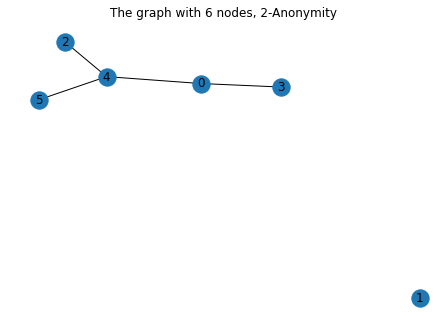

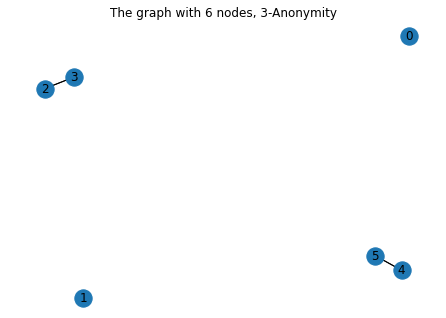


======================= Try k = 3, 4 for the Graph_2 with n = 10 =============================
Graph_2 (10 nodes, 15 edges): degree sequence is [5, 4, 4, 4, 4, 2, 2, 2, 2, 1]
When n = 10, k = 3: 3-anonymous degree sequence: [1, 5, 4, 4, 4, 4, 2, 2, 2, 2]
When n = 10, k = 4: 3-anonymous degree sequence: [0, 5, 3, 3, 3, 3, 3, 3, 3, 3]

======================= Try k = 3, 4 for the Graph_3 with n = 20 =============================
Graph_3 (20 nodes, 30 edges): degree sequence is [6, 5, 5, 5, 4, 4, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 1, 1]
When n = 20, k = 3: 3-anonymous degree sequence: [0, 6, 5, 5, 5, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
When n = 20, k = 4: 3-anonymous degree sequence: [0, 6, 5, 5, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


In [104]:
if __name__ == "__main__":
    anonymized_deg_seq_graph1()
    print()
    anonymized_deg_seq_graph2()
    print()
    anonymized_deg_seq_graph3()